In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline, FeatureUnion
import string
import nltk
from nltk.stem.porter import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, precision_score,recall_score)
from sklearn import metrics
import itertools
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
x=df.drop('label',axis=1)

In [ ]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
y=df['label']

In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
df.shape

(20800, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
#removing the title(we won't use it for analysis)
df.drop(["title"],axis=1,inplace=True)
df.head()

,id,author,text,label
0,0,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#removing the author(we won't use it for analysis)
df.drop(["author"],axis=1,inplace=True)
df.head()

,id,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,Ever get the feeling your life circles the rou...,0
2,2,"Why the Truth Might Get You Fired October 29, ...",1
3,3,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#removing the id(we won't use it for analysis)
df.drop(["id"],axis=1,inplace=True)
df.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#removing null and resetting the indices
df=df.dropna()
messages=df.copy()
messages.reset_index(inplace=True)

In [ ]:
df=df[df["text"].notna()]

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.shape

(20761, 3)

In [ ]:
for i in range(len(df)-1):
  print(i,df["text"][i])

#Data Preprocessing

In [ ]:
# Removing punctuation

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['text'] = df['text'].apply(punctuation_removal)

In [ ]:
# Removing stopwords
import nltk
from nltk.stem.porter import PorterStemmer
import re
ps=PorterStemmer()
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word not in (stopwords_list)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARSHITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Convert to lowercase
df['text'] = df['text'].apply(lambda x: x.lower())

label
0    10387
1    10374
Name: text, dtype: int64


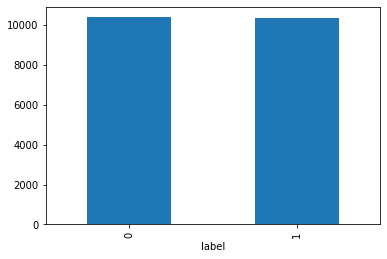

In [ ]:
# How many fake and real articles?
print(df.groupby(['label'])['text'].count())
df.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

       index                                               text  label
1          1  ever get feel life circl roundabout rather hea...      0
5          5  In tri time jacki mason voic reason In week’ e...      0
7          7  pari — franc chose idealist tradit candid sund...      0
8          8  donald J trump schedul make highli anticip vis...      0
9          9  A week michael T flynn resign nation secur adv...      0
...      ...                                                ...    ...
20753  20792  two suicid bomber attack bu station jakarta we...      0
20755  20794  donald trump took twitter friday prais vladimi...      0
20756  20795  rapper T I unload black celebr met donald trum...      0
20757  20796  when green bay packer lost washington redskin ...      0
20758  20797  the macy’ today grew union sever great name am...      0

[10387 rows x 3 columns]


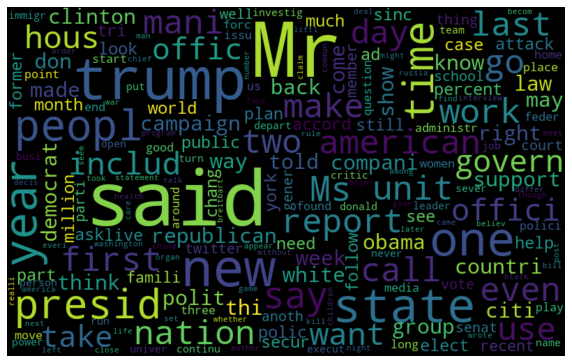

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = df[df["label"] == 0]
print(fake_data)
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

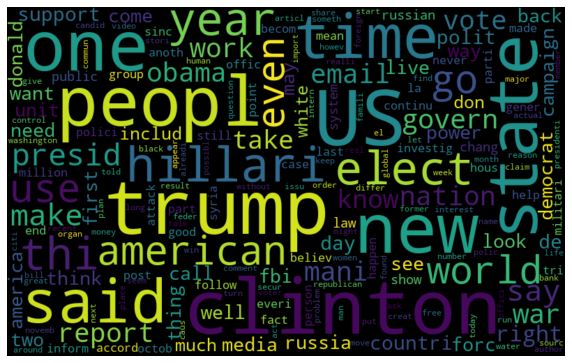

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = df[df["label"] == 1]
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
countV = CountVectorizer(stop_words=stopwords_list,ngram_range=(1,3))
train_count = countV.fit_transform(df["text"].values)

In [ ]:
countV.vocabulary_

{'house': 4976867,
 'dem': 2873585,
 'aide': 499383,
 'even': 3611445,
 'see': 9379396,
 'comey': 2158704,
 'letter': 5924547,
 'jason': 5475688,
 'chaffetz': 1817072,
 'tweeted': 10991310,
 'darrell': 2708115,
 'lucus': 6179171,
 'october': 7231774,
 '30': 165626,
 '2016': 124446,
 'subscribe': 10207466,
 'stump': 10193851,
 'american': 657636,
 'fork': 4172750,
 'utah': 11212970,
 'image': 5084703,
 'courtesy': 2550381,
 'michael': 6548136,
 'jolley': 5528368,
 'available': 1029076,
 'creative': 2584031,
 'commons': 2200466,
 'license': 5951860,
 'apologies': 781034,
 'keith': 5599985,
 'olbermann': 7299523,
 'doubt': 3187474,
 'worst': 11772236,
 'person': 7753682,
 'world': 11746941,
 'week': 11521748,
 'fbi': 3907417,
 'director': 3053796,
 'james': 5463870,
 'according': 284625,
 'democratic': 2885121,
 'looks': 6130413,
 'like': 5977429,
 'also': 592678,
 'know': 5661960,
 'second': 9350771,
 'well': 11548175,
 'turns': 10984539,
 'sent': 9453862,
 'infamous': 5222726,
 'announc

In [ ]:
## Divide the dataset into Train and Test
X_train,X_test,y_train,y_test = train_test_split(df['text'], df.label, test_size=0.33, random_state=42)

In [ ]:
#Function to plot confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
#Function to show to different evaluation score of the model passed
def show_eval_scores(model,y_test,y_pred,model_name):
    y_true = y_test
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    print('Report for ---> {}'.format(model_name))
    print('Accuracy is: {}'.format(accuracy))
    print('F1 score is: {}'.format(f1))
    print('Precision score is: {}'.format(precision))
    print('Recall score is: {}'.format(recall))

    return { 'Accuracy':accuracy , 'F1 score':f1 , 'Precision':precision , 'Recall':recall}

##Logistic Regression

In [ ]:
lr_pipeline = Pipeline([
    ('lrCV', CountVectorizer(stop_words=stopwords_list, lowercase=True, ngram_range=(1, 3))),
    ('lr_clf', LogisticRegression(C=0.0001,random_state=42, n_jobs=-1))
])

In [ ]:
model=lr_pipeline.fit(X_train,y_train)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
lr_eval_scores=show_eval_scores(lr_pipeline,y_test,prediction, 'Logistic Regression Count Vectorizer')

Report for ---> Logistic Regression Count Vectorizer
Accuracy is: 0.8733216579100992
F1 score is: 0.8823210412147506
Precision score is: 0.8221323900960081
Recall score is: 0.952018724400234


In [ ]:
lr_eval_scores

{'Accuracy': 0.8733216579100992,
 'F1 score': 0.8823210412147506,
 'Precision': 0.8221323900960081,
 'Recall': 0.952018724400234}

Confusion matrix, without normalization


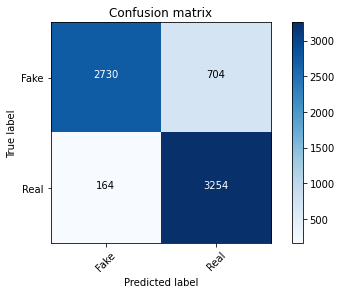

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

##Naive Bayes

In [ ]:
nb_pipeline = Pipeline([
    ('nb_CV', CountVectorizer(stop_words=stopwords_list, lowercase=True, ngram_range=(1, 3))),
    ('nb_clf', MultinomialNB(alpha=6.8))
])

In [ ]:
model=nb_pipeline.fit(X_train,y_train)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
nb_eval_scores=show_eval_scores(nb_pipeline,y_test,prediction, 'Naive Bayes Count Vectorizer')

Report for ---> Naive Bayes Count Vectorizer
Accuracy is: 0.7867775831873906
F1 score is: 0.7284891284147927
Precision score is: 0.9984717269485481
Recall score is: 0.5734347571679345


In [ ]:
nb_eval_scores

{'Accuracy': 0.7867775831873906,
 'F1 score': 0.7284891284147927,
 'Precision': 0.9984717269485481,
 'Recall': 0.5734347571679345}

Confusion matrix, without normalization


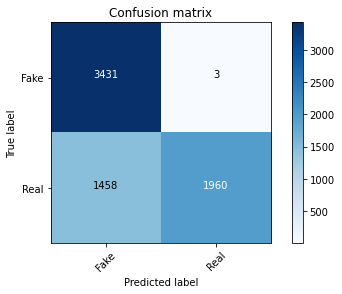

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

##Random Forest

In [ ]:
rf_pipeline = Pipeline([
    ('rf_CV', CountVectorizer(stop_words=stopwords_list, lowercase=True, ngram_range=(1, 3))),
    ('rf_clf', RandomForestClassifier(max_depth=12, n_estimators=300, n_jobs=-1, random_state=42))
])

In [ ]:
model=rf_pipeline.fit(X_train,y_train)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
rf_eval_scores=show_eval_scores(nb_pipeline,y_test,prediction, 'Random Forest Classifier Count Vectorizer')

Report for ---> Random Forest Classifier Count Vectorizer
Accuracy is: 0.8145067133683596
F1 score is: 0.8225108225108225
Precision score is: 0.7868020304568528
Recall score is: 0.8616149795201873


In [ ]:
rf_eval_scores

{'Accuracy': 0.8145067133683596,
 'F1 score': 0.8225108225108225,
 'Precision': 0.7868020304568528,
 'Recall': 0.8616149795201873}

Confusion matrix, without normalization


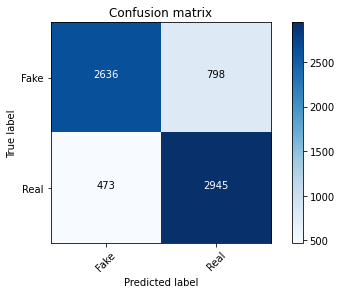

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = Pipeline([('vect', CountVectorizer(stop_words=stopwords_list, lowercase=True, ngram_range=(1, 3))),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])

In [ ]:
model=dt_pipeline.fit(X_train,y_train)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
dt_eval_scores=show_eval_scores(dt_pipeline,y_test,prediction, 'Decision Tree Classifier Count Vectorizer')

Report for ---> Decision Tree Classifier Count Vectorizer
Accuracy is: 0.9115586690017513
F1 score is: 0.9110915492957746
Precision score is: 0.9137728075338435
Recall score is: 0.9084259801053247


In [ ]:
dt_eval_scores

{'Accuracy': 0.9115586690017513,
 'F1 score': 0.9110915492957746,
 'Precision': 0.9137728075338435,
 'Recall': 0.9084259801053247}

Confusion matrix, without normalization


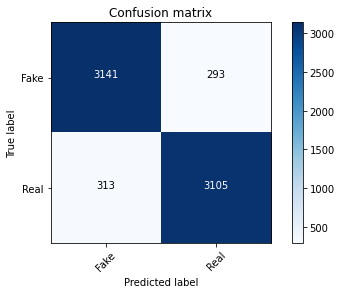

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

##Voting Classifier 

In [ ]:
voting_classifier = VotingClassifier(estimators=[
    ('lr', lr_pipeline), ('nb', nb_pipeline), ('rf', rf_pipeline), ('dt' , dt_pipeline)], voting='soft', n_jobs=-1)

In [ ]:
model=voting_classifier.fit(X_train,y_train)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
voting_classifier_eval_scores=show_eval_scores(voting_classifier,y_test,prediction, 'Voting Classifier Count Vectorizer')

Report for ---> Voting Classifier Count Vectorizer
Accuracy is: 0.9286339754816112
F1 score is: 0.9262332176798914
Precision score is: 0.9560884459669885
Recall score is: 0.898186073727326


In [ ]:
def generate_plot(lr,nb,rf,dt,voting):
    F1 = [lr['F1 score'],nb['F1 score'],rf['F1 score'],dt['F1 score'],voting['F1 score']]

    fig, ax = plt.subplots(figsize=(10, 6))
    num_class = 5
    x = np.arange(num_class)
    wid = 0.2

    p1 = ax.bar(x, F1, width=wid, color='slateblue', bottom=0)

    ax.set_title('Plot')

    # Plot labels
    plt.title("Performance Graph")
    plt.xlabel("Algorithms")
    plt.ylabel("F1 Score")
    plt.xticks(x + wid, ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Decision Tree', 'Voting Classifier'])

    plt.show()

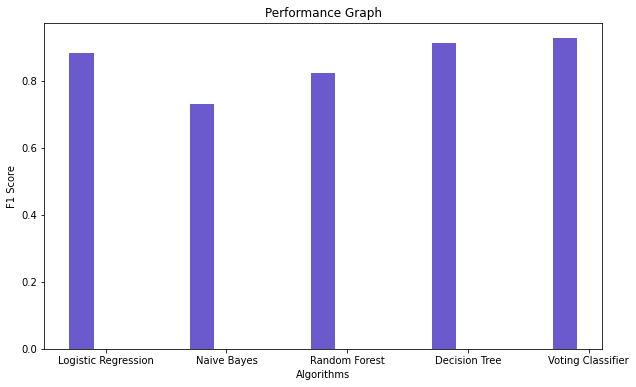

In [ ]:
generate_plot(lr_eval_scores,nb_eval_scores,rf_eval_scores,dt_eval_scores,voting_classifier_eval_scores)

In [ ]:
test_df = pd.read_csv("datasets/test.csv")

In [ ]:
test_df=test_df[test_df["text"].notna()]

In [ ]:
test_df.shape

(5193, 4)

In [ ]:
prediction = model.predict(test_df["text"])

In [ ]:
df=pd.DataFrame(columns=[test_df["id"],prediction])
df

id,20800,20801,20802,20803,20804,20805,20806,20807,20808,20809,...,25990,25991,25992,25993,25994,25995,25996,25997,25998,25999
,0,1,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


##DataSet-1 with TF-IDF Vectorizer

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
uploaded = files.upload()

In [ ]:
df_valid=pd.read_csv(io.BytesIO(uploaded['valid.csv']))

In [ ]:
df = pd.concat([df_train,df_valid], axis=0, sort=False)
df= df.sample(frac=1).reset_index()
df.head(5)

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1226,5871.json,true,We are coming up on our 40th anniversary of el...,"congress,elections",chris-christie,Governor of New Jersey,New Jersey,republican,10,17,27,19,8,a speech at a Cato Institute event
1,5215,10593.json,barely-true,The labor participation rate is at an all-time...,"economy,jobs",lindsey-graham,U.S. senator,South Carolina,republican,2,2,4,2,0,"comments on NBC's ""Meet the Press"""
2,3551,11171.json,barely-true,On allowing abortion in cases of rape or inces...,abortion,marco-rubio,U.S. Senator,Florida,republican,33,24,32,35,5,comments at a GOP debate in Cleveland
3,5037,10657.json,false,EPA wants to regulate the family BBQ.,"environment,food-safety,government-regulation",allen-west,"U.S. representative, Florida District 22",Florida,republican,6,9,3,1,4,a post on his website
4,6506,5509.json,true,Says he cut taxes by more than $600 million wh...,"job-accomplishments,state-budget,taxes",george-allen,consultant,Virginia,republican,2,8,3,4,1,an op-ed


In [ ]:
df.shape

(11553, 15)

In [ ]:
# naming the columns of the dataset
df.columns=["index","ID", "label", "text", "subject", "speaker", "job", "state", "party", "barely_true_cts",
        "false_cts", "half_true_cts", "mostly_true_cts", "pants_on_fire_cts", "context"]

In [ ]:
df.head(5)

,index,ID,label,text,subject,speaker,job,state,party,barely_true_cts,false_cts,half_true_cts,mostly_true_cts,pants_on_fire_cts,context
0,1226,5871.json,true,We are coming up on our 40th anniversary of el...,"congress,elections",chris-christie,Governor of New Jersey,New Jersey,republican,10,17,27,19,8,a speech at a Cato Institute event
1,5215,10593.json,barely-true,The labor participation rate is at an all-time...,"economy,jobs",lindsey-graham,U.S. senator,South Carolina,republican,2,2,4,2,0,"comments on NBC's ""Meet the Press"""
2,3551,11171.json,barely-true,On allowing abortion in cases of rape or inces...,abortion,marco-rubio,U.S. Senator,Florida,republican,33,24,32,35,5,comments at a GOP debate in Cleveland
3,5037,10657.json,false,EPA wants to regulate the family BBQ.,"environment,food-safety,government-regulation",allen-west,"U.S. representative, Florida District 22",Florida,republican,6,9,3,1,4,a post on his website
4,6506,5509.json,true,Says he cut taxes by more than $600 million wh...,"job-accomplishments,state-budget,taxes",george-allen,consultant,Virginia,republican,2,8,3,4,1,an op-ed


Text(0.5, 1.0, 'Types & Number of Classes in the dataset')

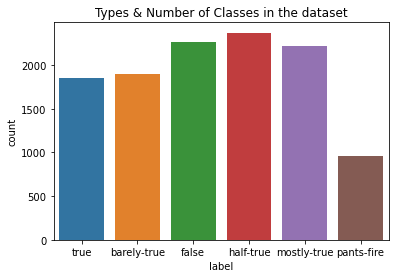

In [ ]:
sns.countplot(x='label',data=df)
plt.title('Types & Number of Classes in the dataset')

In [ ]:
#function for mapping labels "true, mostly-true, half-true" to TRUE and "false, barely-true, pants-fire" to FAKE.
def modify_dataset_1(data):
    
    data = data.iloc[:, [2, 3]]
    data.columns = ['label', 'text']
    Original_labels = {
        'true': 1,
        'mostly-true': 1,
        'half-true': 1,
        'false': 0,
        'barely-true': 0,
        'pants-fire': 0
    }
    data['label'] = data['label'].map(Original_labels)

    return data

In [ ]:
df=modify_dataset_1(df)

<ipython-input-7-f4c44b8b759b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map(Original_labels)


In [ ]:
df.head()

,label,text
0,1,We are coming up on our 40th anniversary of el...
1,0,The labor participation rate is at an all-time...
2,0,On allowing abortion in cases of rape or inces...
3,0,EPA wants to regulate the family BBQ.
4,1,Says he cut taxes by more than $600 million wh...


In [ ]:
df_binary = df_train2

In [ ]:
df_binary.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df_binary.shape

(20800, 5)

In [ ]:
df_binary=df_binary[df_binary["text"].notna()]

In [ ]:
df_binary.reset_index(inplace=True)

In [ ]:
df_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20761 entries, 0 to 20760
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   20761 non-null  int64 
 1   id      20761 non-null  int64 
 2   title   20203 non-null  object
 3   author  18843 non-null  object
 4   text    20761 non-null  object
 5   label   20761 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 973.3+ KB


In [ ]:
df_binary.head(5)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


##Data preprocessing

In [ ]:
# Removing punctuation
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
    
df['text'] = df['text'].apply(punctuation_removal)
df_binary['text']=df_binary['text'].apply(punctuation_removal)

<ipython-input-14-898743729203>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['text']=df_binary['text'].apply(punctuation_removal)


In [ ]:
# Removing stopwords and stemming
ps=PorterStemmer()
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word not in (stopwords_list)]))
df_binary['text'] = df_binary['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word not in (stopwords_list)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARSHITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-15-8752e3ae3f82>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['text'] = df_binary['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word not in (stopwords_list)]))


In [ ]:
# Convert to lowercase
df_binary['text'] = df_binary['text'].apply(lambda x: x.lower())
# Convert to lowercase
df['text'] = df['text'].apply(lambda x: x.lower())

<ipython-input-16-1595594e91fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['text'] = df_binary['text'].apply(lambda x: x.lower())


label
barely-true    1894
false          2261
half-true      2371
mostly-true    2217
pants-fire      958
true           1852
Name: text, dtype: int64


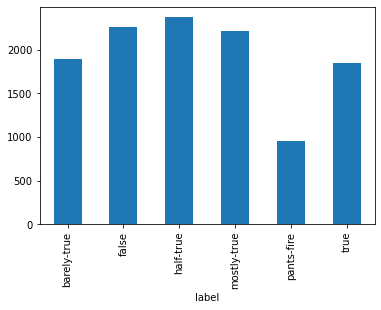

In [ ]:
# How many fake and real articles?
print(df.groupby(['label'])['text'].count())
df.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

label
0    10387
1    10374
Name: text, dtype: int64


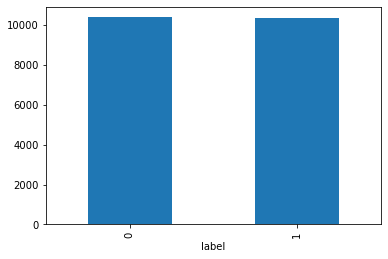

In [ ]:
# How many fake and real articles?
print(df_binary.groupby(['label'])['text'].count())
df_binary.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

In [ ]:
X_bin=df_binary['text']

In [ ]:
X_bin.head(5)

0    hous dem aid we didn’t even see comey’ letter ...
1    ever get feel life circl roundabout rather hea...
2    whi truth might get you fire octob 29 2016 the...
3    video 15 civilian kill in singl us airstrik ha...
4    print an iranian woman sentenc six year prison...
Name: text, dtype: object

In [ ]:
y_bin=df_binary['label']

In [ ]:
y_bin.head(5)

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
## Divide the dataset into Train and Test
X_bin_train,X_bin_test,y_bin_train,y_bin_test = train_test_split(X_bin,y_bin, test_size=0.33, random_state=42)

In [ ]:
print(len(X_bin_train), len(X_bin_test))
print(len(y_bin_train), len(y_bin_test))

13909 6852
13909 6852


In [ ]:
#Function to show to different evaluation score of the model passed
def show_eval_scores(model,y_test,y_pred,model_name):
    y_true = y_test
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    print('Report for ---> {}'.format(model_name))
    print('Accuracy is: {}'.format(accuracy))
    print('F1 score is: {}'.format(f1))
    print('Precision score is: {}'.format(precision))
    print('Recall score is: {}'.format(recall))

    return { 'Accuracy':accuracy , 'F1 score':f1 , 'Precision':precision , 'Recall':recall}

In [ ]:
#Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##Logistic Regression

In [ ]:
lr_pipeline = Pipeline([
    ('lrCV', CountVectorizer(stop_words=stopwords_list, lowercase=True, ngram_range=(1, 3))),
    ('norm2', TfidfTransformer(norm=None)),
    ('lr_clf', LogisticRegression(C=0.0001,random_state=42, n_jobs=-1))
])

In [ ]:
model_1=lr_pipeline.fit(X_bin_train,y_bin_train)

In [ ]:
prediction = model_1.predict(X_bin_test)

In [ ]:
lr_eval_scores=show_eval_scores(lr_pipeline,y_bin_test,prediction, 'Logistic Regression')

Report for ---> Logistic Regression
Accuracy is: 0.9338879159369528
F1 score is: 0.935460891864938
Precision score is: 0.9116911968897529
Recall score is: 0.9605032182562903


In [ ]:
lr_eval_scores

{'Accuracy': 0.9338879159369528,
 'F1 score': 0.935460891864938,
 'Precision': 0.9116911968897529,
 'Recall': 0.9605032182562903}

Confusion matrix, without normalization


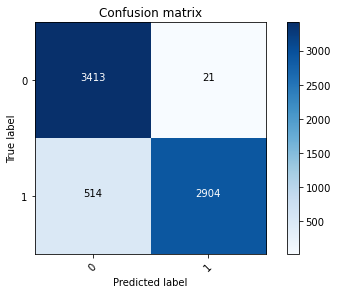

In [ ]:
cm = metrics.confusion_matrix(y_bin_test, prediction)
plot_confusion_matrix(cm, classes=[0, 1])

##Naive Bayes

In [ ]:
# Using Multinomial Naive Bayes classifier
nb_pipeline = Pipeline([
    ('nb_CV', CountVectorizer(stop_words=stopwords_list, lowercase=True, ngram_range=(1, 3))),
    ('norm2', TfidfTransformer(norm=None)),
    ('nb_clf', MultinomialNB(alpha=6.8))
])

In [ ]:
model_1=nb_pipeline.fit(X_bin_train,y_bin_train)

In [ ]:
prediction = model_1.predict(X_bin_test)

In [ ]:
nb_eval_scores=show_eval_scores(nb_pipeline,y_bin_test,prediction, 'Naive Bayes')

Report for ---> Naive Bayes
Accuracy is: 0.9219206071220082
F1 score is: 0.9156550528141258
Precision score is: 0.9928205128205129
Recall score is: 0.8496196606202457


Confusion matrix, without normalization


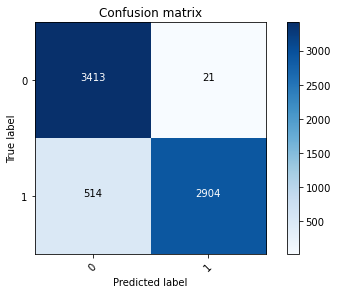

In [ ]:
cm = metrics.confusion_matrix(y_bin_test, prediction)
plot_confusion_matrix(cm, classes=[0, 1])

##Random Forest

In [ ]:
rf_pipeline = Pipeline([
    ('rf_CV', CountVectorizer(stop_words=stopwords_list, lowercase=True, ngram_range=(1, 3))),
    ('norm2', TfidfTransformer(norm=None)),
    ('rf_clf', RandomForestClassifier(max_depth=12, n_estimators=300, n_jobs=-1, random_state=42))
])

In [ ]:
model_1=rf_pipeline.fit(X_bin_train,y_bin_train)

In [ ]:
prediction = model_1.predict(X_bin_test)

In [ ]:
rf_eval_scores=show_eval_scores(rf_pipeline,y_bin_test,prediction, 'Random Forest Classifier')

Report for ---> Random Forest Classifier
Accuracy is: 0.8145067133683596
F1 score is: 0.8225108225108225
Precision score is: 0.7868020304568528
Recall score is: 0.8616149795201873


Confusion matrix, without normalization


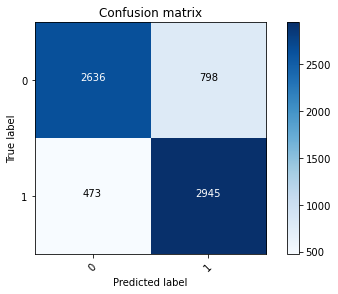

In [ ]:
cm = metrics.confusion_matrix(y_bin_test, prediction)
plot_confusion_matrix(cm, classes=[0, 1])

##SVM

In [ ]:
svm_pipeline = Pipeline([
    ('svm_CV', CountVectorizer(stop_words=stopwords_list, lowercase=False, ngram_range=(1, 3))),
    ('norm2', TfidfTransformer(norm=None)),
    ('svm_clf', SVC(random_state=42, gamma=1.0, kernel='rbf'))
])

In [ ]:
model_1=svm_pipeline.fit(X_bin_train,y_bin_train)

In [ ]:
prediction = model_1.predict(X_bin_test)

In [ ]:
svm_eval_scores=show_eval_scores(svm_pipeline,y_bin_test,prediction, 'Support Vector Machine Classifier')

Report for ---> Support Vector Machine Classifier
Accuracy is: 0.5232049036777583
F1 score is: 0.08461753992715046
Precision score is: 1.0
Recall score is: 0.044177881802223526


Confusion matrix, without normalization


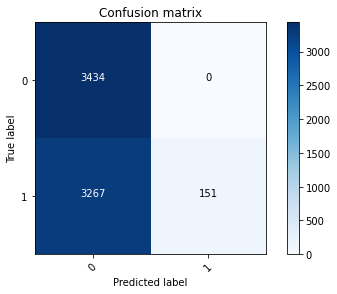

In [ ]:
cm = metrics.confusion_matrix(y_bin_test, prediction)
plot_confusion_matrix(cm, classes=[0, 1])

##Decision Tree

In [ ]:
dt_pipeline = Pipeline([('vect', CountVectorizer(stop_words=stopwords_list, lowercase=True, ngram_range=(1, 3))),
('norm2', TfidfTransformer(norm=None)),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])

In [ ]:
model_1=dt_pipeline.fit(X_bin_train,y_bin_train)

In [ ]:
prediction = model_1.predict(X_bin_test)

In [ ]:
dt_eval_scores=show_eval_scores(dt_pipeline,y_bin_test,prediction, 'Decision Tree Classifier')

Report for ---> Decision Tree Classifier
Accuracy is: 0.9115586690017513
F1 score is: 0.9110915492957746
Precision score is: 0.9137728075338435
Recall score is: 0.9084259801053247


Confusion matrix, without normalization


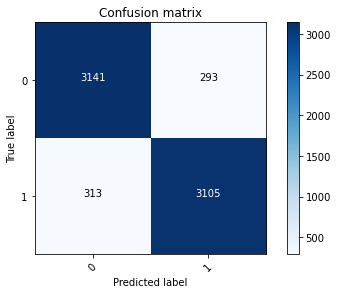

In [ ]:
cm = metrics.confusion_matrix(y_bin_test, prediction)
plot_confusion_matrix(cm, classes=[0, 1])

##Voting Classifier

In [ ]:
voting_classifier = VotingClassifier(estimators=[
    ('lr', lr_pipeline), ('nb', nb_pipeline), ('rf', rf_pipeline), ('dt' , dt_pipeline),], voting='soft', n_jobs=-1)

In [ ]:
model_1=voting_classifier.fit(X_bin_train,y_bin_train)

In [ ]:
prediction = model_1.predict(X_bin_test)

In [ ]:
voting_classifier_eval_scores=show_eval_scores(voting_classifier,y_bin_test,prediction, 'Voting Classifier')

Report for ---> Voting Classifier
Accuracy is: 0.9591360186806772
F1 score is: 0.9586166124741354
Precision score is: 0.9686379928315412
Recall score is: 0.9488004681100058


In [ ]:
def generate_plot(lr,nb,rf,dt,voting):
    F1 = [lr['F1 score'],nb['F1 score'],rf['F1 score'],dt['F1 score'],voting['F1 score']]

    fig, ax = plt.subplots(figsize=(10, 6))
    num_class = 5
    x = np.arange(num_class)
    wid = 0.2

    p1 = ax.bar(x, F1, width=wid, color='slateblue', bottom=0)

    ax.set_title('Plot')

    # Plot labels
    plt.title("Performance Graph")
    plt.xlabel("Algorithms")
    plt.ylabel("F1 Score")
    plt.xticks(x + wid, ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Decision Tree', 'Voting Classifier'])

    plt.show()

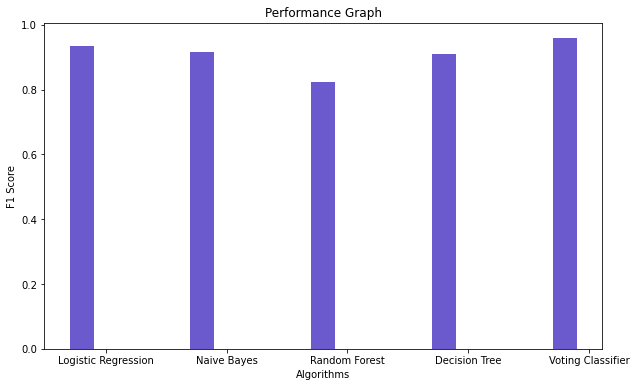

In [ ]:
generate_plot(lr_eval_scores,nb_eval_scores,rf_eval_scores,dt_eval_scores,voting_classifier_eval_scores)

##DtaSet-2 with TF-IDF Vectorizer

In [ ]:
X=df['text']

In [ ]:
X.head

<bound method NDFrame.head of 0        we come 40th anniversari elect republican unit...
1                       the labor particip rate alltim low
2        on allow abort case rape incest i never said a...
3                                epa want regul famili bbq
4                      say cut tax 600 million wasgovernor
                               ...                        
11548                         say nelson mandela communist
11549    under new law regul abort even your rape dont ...
11550    john mccain health care plan leav pay mccain h...
11551    the administr rais revenu nation health care s...
11552    under capandtrad bill home would retrofit meet...
Name: text, Length: 11553, dtype: object>

In [ ]:
y=df['label']

In [ ]:
y.head

<bound method NDFrame.head of 0        1
1        0
2        0
3        0
4        1
        ..
11548    1
11549    1
11550    0
11551    0
11552    0
Name: label, Length: 11553, dtype: int64>

In [ ]:
## Divide the dataset into Train and Test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33, random_state=42)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

7740 3813
7740 3813


In [ ]:
# function for results of model fitting
def print_scores():
    print("Accuracy: ", accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    

##Logistic Regression

In [ ]:
lr_model = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='word',stop_words=stopwords_list,ngram_range=(1, 3))),
    ('norm2', TfidfTransformer(norm=None)),
    ('clf', LogisticRegression(C=0.0001,random_state=42, n_jobs=-1)),
])


In [ ]:
# fitting the model
model=lr_model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
lr_eval_scores=show_eval_scores(lr_model,y_test,predictions, 'Logistic Regression Classifier')

Report for ---> Logistic Regression Classifier
Accuracy is: 0.5759244689221086
F1 score is: 0.7193195625759417
Precision score is: 0.5700137551581843
Recall score is: 0.9746001881467544


Confusion matrix, without normalization


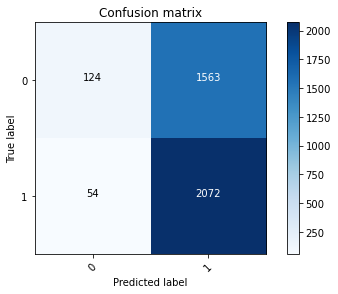

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes=[0,1])

In [ ]:
# limiting the max features to 1000 and checking the model
lr_model.set_params(vectorizer__max_features=1000)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=1000, ngram_range=(1, 3),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('norm2', TfidfTransformer(norm=None)),
                ('clf',
                 LogisticRegression(C=0.0001, n_jobs=-1, random_state=42))])

In [ ]:
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)


In [ ]:
lr_eval_scores=show_eval_scores(lr_model,y_test,predictions, 'Logistic Regression Classifier')
# the accuracy is reduced so reverting back without setting max features

Report for ---> Logistic Regression Classifier
Accuracy is: 0.5730396013637555
F1 score is: 0.7186311787072243
Precision score is: 0.5680327868852459
Recall score is: 0.977892756349953


Confusion matrix, without normalization


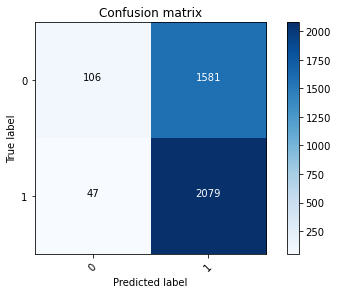

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes=[0,1])

##Naive Bayes

In [ ]:
nb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='word',stop_words=stopwords_list,ngram_range=(1, 3))),
    ('norm2', TfidfTransformer(norm=None)),
    ('clf', MultinomialNB(alpha=6.8)),
])

In [ ]:
nb_pipeline.fit(X_train, y_train)
predictions = nb_pipeline.predict(X_test)

In [ ]:
nb_eval_scores=show_eval_scores(nb_pipeline,y_test,predictions, 'Naive Bayes Classifier')

Report for ---> Naive Bayes Classifier
Accuracy is: 0.6063467086283766
F1 score is: 0.6706166337502744
Precision score is: 0.6285479226655697
Recall score is: 0.7187206020696143


Confusion matrix, without normalization


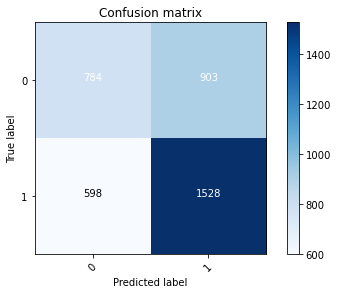

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes=[0,1])

##Random Forest

In [ ]:
rf_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='word',stop_words=stopwords_list,ngram_range=(1, 3))),
    ('norm2', TfidfTransformer(norm=None)),
    ('clf', RandomForestClassifier(max_depth=12, n_estimators=300, n_jobs=-1, random_state=42)),
])

In [ ]:
rf_pipeline.fit(X_train, y_train)
predictions = rf_pipeline.predict(X_test)

In [ ]:
rf_eval_scores=show_eval_scores(rf_pipeline,y_test,predictions, 'Random Forest Classifier')

Report for ---> Random Forest Classifier
Accuracy is: 0.5591397849462365
F1 score is: 0.7166694758132479
Precision score is: 0.5584449697924875
Recall score is: 1.0


Confusion matrix, without normalization


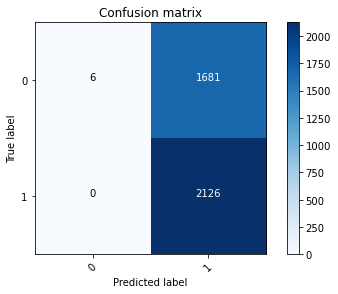

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes=[0,1])

##Decision Tree

In [ ]:
dt_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='word',stop_words=stopwords_list,ngram_range=(1, 3))),
    ('norm2', TfidfTransformer(norm=None)),
    ('clf', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42)),
])

In [ ]:
dt_pipeline.fit(X_train, y_train)
predictions = dt_pipeline.predict(X_test)

In [ ]:
dt_eval_scores=show_eval_scores(dt_pipeline,y_test,predictions, 'Decision Tree Classifier')

Report for ---> Decision Tree Classifier
Accuracy is: 0.5761867296092316
F1 score is: 0.6965828013518588
Precision score is: 0.5796875
Recall score is: 0.8725305738476011


Confusion matrix, without normalization


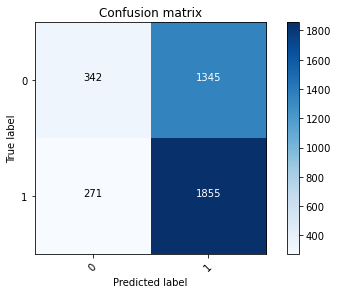

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes=[0,1])

##Voting Classifier

In [ ]:
voting_classifier = VotingClassifier(estimators=[
    ('lr', lr_model), ('nb', nb_pipeline), ('rf', rf_pipeline), ('dt' , dt_pipeline),], voting='soft', n_jobs=-1)

In [ ]:
model=voting_classifier.fit(X_train,y_train)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
voting_classifier_eval_scores=show_eval_scores(voting_classifier,y_test,prediction, 'Voting Classifier')

Report for ---> Voting Classifier
Accuracy is: 0.6003147128245476
F1 score is: 0.672961373390558
Precision score is: 0.6187845303867403
Recall score is: 0.7375352775164629


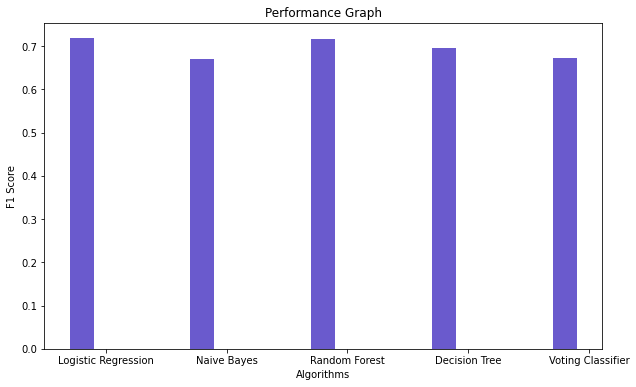

In [ ]:
generate_plot(lr_eval_scores,nb_eval_scores,rf_eval_scores,dt_eval_scores,voting_classifier_eval_scores)